In [195]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import seaborn as sns
from scipy import stats

In [198]:
def distances(dist_ps, samp_ps):
    diff = np.abs(dist_ps - samp_ps)
    mask = (diff > -np.inf) & (diff < np.inf)
    diff_noinf = np.where(mask, diff, 0)
    samp_linf = max(diff_noinf)
    samp_l1n = sum(diff_noinf)/sum(mask)
    return samp_linf, samp_l1n

def simulate(n, p_res=100, reps=1000, seed=1234, dist=stats.norm(loc=0, scale=1)):
    np.random.seed(1234)
    res_linf = np.zeros(reps)
    res_l1n = np.zeros(reps)

    ps = np.linspace(0, 1, num=p_res)
    dist_ps = dist.ppf(ps)
    for i in range(reps):
        samp = dist.rvs(n)
        samp_ps = np.percentile(samp, ps*100)
        res_linf[i], res_l1n[i] = distances(dist_ps, samp_ps)

    return res_linf, res_l1n

def summarize(res_linf, res_l1n):
    return pd.DataFrame([[np.mean(res_linf), np.std(res_linf)],
                 [np.mean(res_l1n), np.std(res_l1n)]], 
                 columns=['mean', 'sd'], 
                 index=['Linf', 'L1'])


def simulate_many(samp_max, dist=stats.norm(loc=0, scale=1)):
    samp_space = range(2, samp_max+1, 2)
    cols = ['Linf mean', 'Linf SD', 'L1 mean', 'L1 SD', 'samples']
    samp_results = np.zeros((len(samp_space), len(cols)))  
    for i, samp in enumerate(samp_space):
        res_linf, res_l1n = simulate(samp, dist=dist)
        samp_results[i, :] = [*summarize(res_linf, res_l1n).to_numpy().flatten(), samp]

    return pd.DataFrame(samp_results, columns=cols)

In [199]:
df = simulate_many(30)
df['Distribution'] = 'Normal'
df

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,2.33,0.59,0.77,0.31,2.0,Normal
1,1.77,0.49,0.56,0.23,4.0,Normal
2,1.49,0.43,0.46,0.19,6.0,Normal
3,1.33,0.39,0.41,0.17,8.0,Normal
4,1.22,0.37,0.37,0.16,10.0,Normal
5,1.12,0.34,0.34,0.14,12.0,Normal
6,1.04,0.32,0.31,0.12,14.0,Normal
7,0.99,0.31,0.30,0.12,16.0,Normal
8,0.94,0.30,0.28,0.11,18.0,Normal
9,0.91,0.29,0.27,0.11,20.0,Normal


In [200]:
df2 = simulate_many(30, stats.expon(1))
df2['Distribution'] = 'Exponential(1)'
df2

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,3.27,0.82,0.74,0.43,2.0,Exponential(1)
1,2.71,0.85,0.51,0.25,4.0,Exponential(1)
2,2.41,0.82,0.42,0.20,6.0,Exponential(1)
3,2.19,0.81,0.37,0.16,8.0,Exponential(1)
4,2.03,0.80,0.34,0.15,10.0,Exponential(1)
5,1.90,0.75,0.31,0.14,12.0,Exponential(1)
6,1.77,0.75,0.29,0.12,14.0,Exponential(1)
7,1.68,0.73,0.27,0.12,16.0,Exponential(1)
8,1.62,0.71,0.25,0.11,18.0,Exponential(1)
9,1.57,0.72,0.24,0.11,20.0,Exponential(1)


In [201]:
df3 = simulate_many(30, stats.poisson(1))
df3['Distribution'] = 'Poisson(1)'
df3

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,2.73,0.75,0.78,0.38,2.0,Poisson(1)
1,2.20,0.66,0.56,0.25,4.0,Poisson(1)
2,1.94,0.63,0.47,0.21,6.0,Poisson(1)
3,1.71,0.59,0.40,0.18,8.0,Poisson(1)
4,1.59,0.55,0.36,0.16,10.0,Poisson(1)
5,1.51,0.52,0.33,0.15,12.0,Poisson(1)
6,1.42,0.47,0.30,0.13,14.0,Poisson(1)
7,1.35,0.45,0.28,0.12,16.0,Poisson(1)
8,1.32,0.43,0.26,0.12,18.0,Poisson(1)
9,1.29,0.41,0.25,0.11,20.0,Poisson(1)


In [202]:
df4 = simulate_many(30, stats.beta(2,2))
df4['Distribution'] = 'Beta(2,2)'
df4

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,0.50,0.15,0.18,0.07,2.0,"Beta(2,2)"
1,0.36,0.12,0.13,0.06,4.0,"Beta(2,2)"
2,0.30,0.09,0.11,0.04,6.0,"Beta(2,2)"
3,0.26,0.08,0.09,0.04,8.0,"Beta(2,2)"
4,0.23,0.07,0.08,0.03,10.0,"Beta(2,2)"
5,0.22,0.07,0.08,0.03,12.0,"Beta(2,2)"
6,0.20,0.06,0.07,0.03,14.0,"Beta(2,2)"
7,0.19,0.06,0.07,0.03,16.0,"Beta(2,2)"
8,0.18,0.06,0.06,0.03,18.0,"Beta(2,2)"
9,0.17,0.05,0.06,0.03,20.0,"Beta(2,2)"


In [203]:
df5 = simulate_many(30, stats.gamma(2,2))
df5['Distribution'] = 'Gamma(2,2)'
df5

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,4.01,1.08,1.05,0.51,2.0,"Gamma(2,2)"
1,3.24,1.11,0.75,0.36,4.0,"Gamma(2,2)"
2,2.85,1.05,0.62,0.28,6.0,"Gamma(2,2)"
3,2.60,1.01,0.55,0.24,8.0,"Gamma(2,2)"
4,2.39,0.97,0.49,0.21,10.0,"Gamma(2,2)"
5,2.23,0.91,0.45,0.19,12.0,"Gamma(2,2)"
6,2.11,0.88,0.42,0.18,14.0,"Gamma(2,2)"
7,1.99,0.85,0.40,0.16,16.0,"Gamma(2,2)"
8,1.91,0.84,0.38,0.15,18.0,"Gamma(2,2)"
9,1.85,0.80,0.37,0.15,20.0,"Gamma(2,2)"


In [204]:
df6 = simulate_many(30, stats.uniform(0,1))
df6['Distribution'] = 'Uniform(0,1)'
df6

,Linf mean,Linf SD,L1 mean,L1 SD,samples,Distribution
0,0.51,0.21,0.23,0.10,2.0,"Uniform(0,1)"
1,0.34,0.14,0.17,0.07,4.0,"Uniform(0,1)"
2,0.28,0.11,0.13,0.06,6.0,"Uniform(0,1)"
3,0.25,0.10,0.12,0.05,8.0,"Uniform(0,1)"
4,0.23,0.09,0.11,0.05,10.0,"Uniform(0,1)"
5,0.21,0.08,0.09,0.04,12.0,"Uniform(0,1)"
6,0.20,0.07,0.09,0.04,14.0,"Uniform(0,1)"
7,0.19,0.07,0.08,0.04,16.0,"Uniform(0,1)"
8,0.18,0.06,0.08,0.03,18.0,"Uniform(0,1)"
9,0.17,0.06,0.07,0.03,20.0,"Uniform(0,1)"


In [205]:
mdf = pd.concat([df, df2, df3, df4, df5, df6])

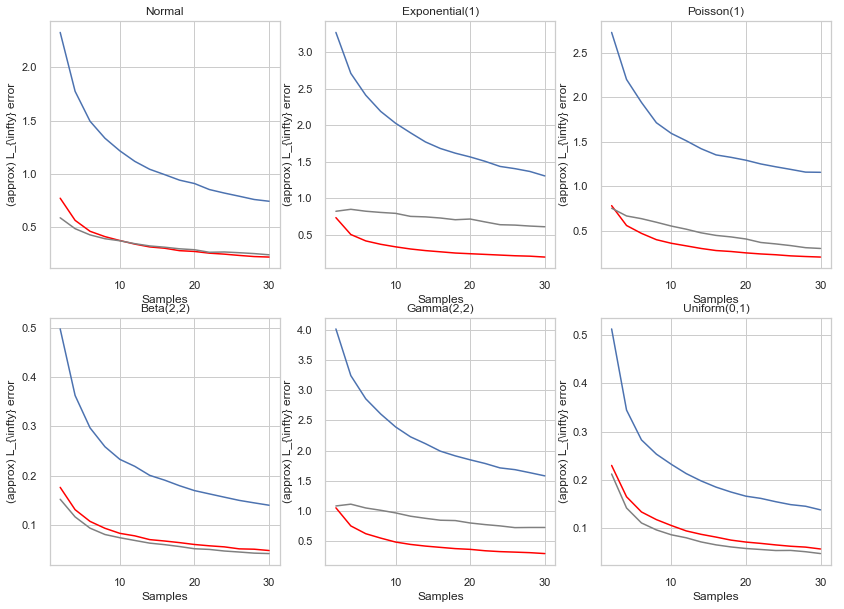

In [206]:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True) rc('text', usetex=False)
sns.set(style='whitegrid')
distributions = pd.unique(mdf['Distribution'])
figdim = (int(np.ceil(len(distributions)/3.0)), len(distributions))
fig = plt.subplots(nrows=figdim[0], ncols=3, 
                   figsize=(14, 2+4*np.ceil(len(distributions)/3.0)))
for i, dist in enumerate(distributions):
    currdf = mdf.loc[mdf['Distribution'] == dist, :]
    ax = plt.subplot(figdim[0], 3, i+1)
    ax.plot(currdf['samples'], currdf['Linf mean'])
    ax.plot(currdf['samples'], currdf['L1 mean'], color='red')
    ax.plot(currdf['samples'], currdf['Linf SD'], color='grey')
    ax.set(xlabel='Samples', ylabel='(approx) L_{\infty} error', title=dist)
    
plt.show()

In [207]:
res_linf, res_l1n = simulate(2, dist=stats.beta(2,2), reps=10000)
summarize(res_linf, res_l1n)
res5_linf, res5_l1n = simulate(5, dist=stats.beta(2,2), reps=10000)


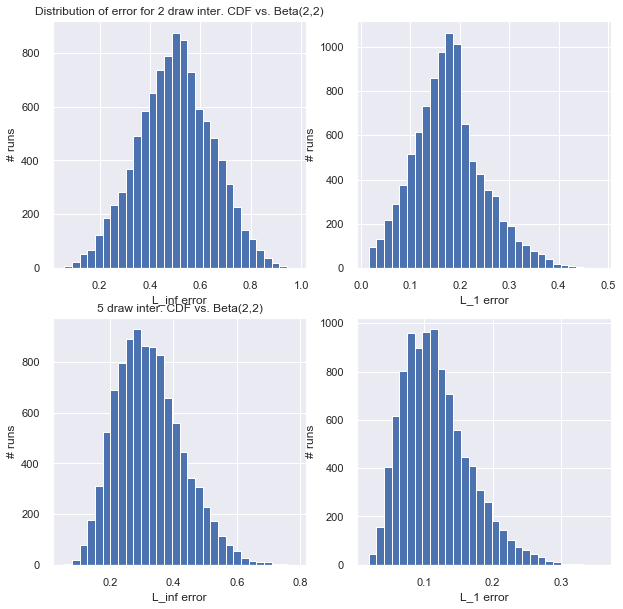

In [208]:
sns.set()
nbins = min([30, int(reps / 10)])

fig = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = plt.subplot(2, 2, 1)
n, bins, patches = ax.hist(res_linf, nbins, density=False)
ax.set(xlabel='L_inf error', ylabel='# runs', title='Distribution of error for 2 draw inter. CDF vs. Beta(2,2)')
ax = plt.subplot(2, 2, 2)
n, bins, patches = ax.hist(res_l1n, nbins, density=False)
ax.set(xlabel='L_1 error', ylabel='# runs', title='')
ax = plt.subplot(2, 2, 3)
n, bins, patches = ax.hist(res5_linf, nbins, density=False)
ax.set(xlabel='L_inf error', ylabel='# runs', title='5 draw inter. CDF vs. Beta(2,2)')
ax = plt.subplot(2, 2, 4)
n, bins, patches = ax.hist(res5_l1n, nbins, density=False)
ax.set(xlabel='L_1 error', ylabel='# runs', title='')
plt.show()

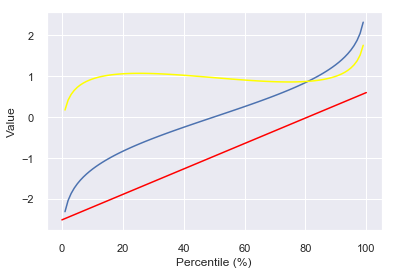

In [214]:
ps = np.linspace(0, 1, num=100)
dist = stats.norm(0, 1)
dist_ps = dist.ppf(ps)
samp = dist.rvs(2)
samp_ps = np.percentile(samp, ps*100)
diff = np.abs(dist_ps - samp_ps)
sns.set()
fig, ax = plt.subplots()
ax.plot(ps*100.0, dist_ps)
ax.plot(ps*100.0, samp_ps, color='red')
ax.plot(ps*100.0, diff, color='yellow')

ax.set(xlabel='Percentile (%)', ylabel='Value',
       title='')
plt.show()

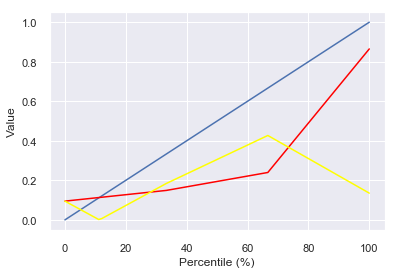

In [215]:
sns.set(style='whitegrid')
ps = np.linspace(0, 1, num=100)
dist = stats.uniform(0, 1)
dist_ps = dist.ppf(ps)
samp = dist.rvs(4)
samp_ps = np.percentile(samp, ps*100)
diff = np.abs(dist_ps - samp_ps)
sns.set()
fig, ax = plt.subplots()
ax.plot(ps*100.0, dist_ps)
ax.plot(ps*100.0, samp_ps, color='red')
ax.plot(ps*100.0, diff, color='yellow')

ax.set(xlabel='Percentile (%)', ylabel='Value',
       title='')
plt.show()

In [216]:
samp

array([0.09480951, 0.23973092, 0.8647889 , 0.1490383 ])

In [217]:
plt.close()